##IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

##LOADING DATASET

In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

DATA PREPROCESSING

In [6]:
numerical_columns = []
categorical_columns = []
for column in df.columns:
    if df[column].dtype !='O':
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)

In [7]:
for column in categorical_columns:
    print(f'{column}: {len(df[column].unique())}')

job: 12
marital: 4
education: 8
default: 3
housing: 3
loan: 3
contact: 2
month: 10
day_of_week: 5
poutcome: 3
y: 2


In [8]:
encoding_columns = ['job','marital','education','housing','loan','contact']
more_label_columns = ['month','day_of_week','poutcome']

In [9]:
df1 = df.drop('default',axis=1)

In [10]:
df1['housing'].replace('unknown','no',inplace=True)
df1['housing'].value_counts()

yes    21576
no     19612
Name: housing, dtype: int64

In [11]:
df1['loan'].replace('unknown','yes',inplace=True)

In [12]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


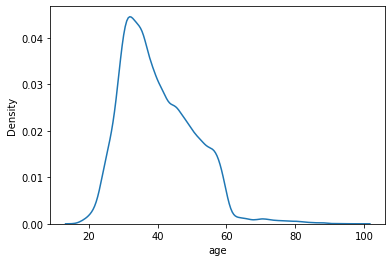

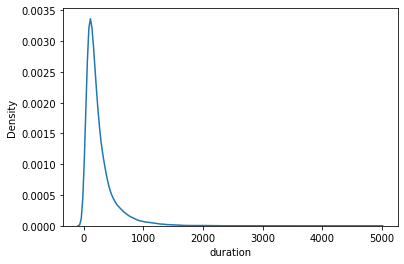

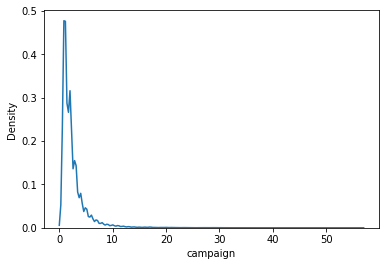

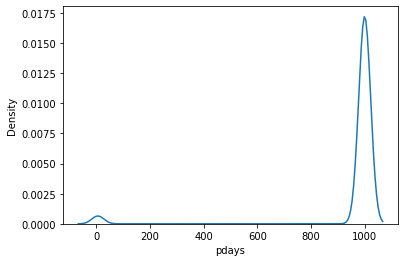

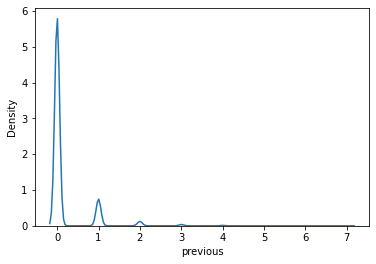

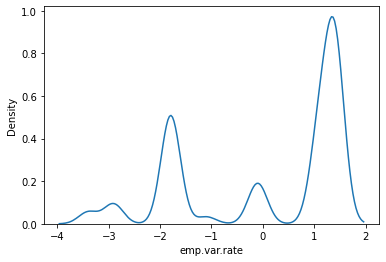

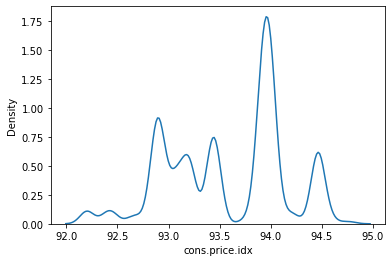

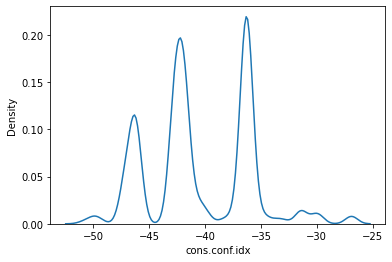

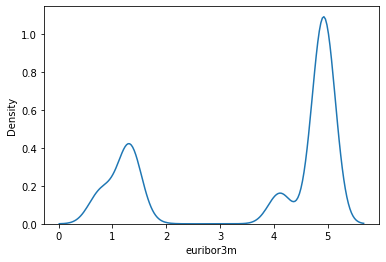

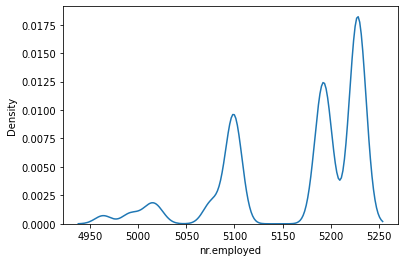

In [13]:
for i, column in enumerate(numerical_columns):
    plt.figure(i)
    print(sns.kdeplot(df[column]))

In [14]:
df1.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('onehot',OneHotEncoder(sparse=False,drop='first'),encoding_columns),
    ('Ordinal',OrdinalEncoder(),more_label_columns),
    ('scaling', RobustScaler(),numerical_columns)
],remainder='passthrough')

In [16]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]


In [17]:
X = transformer.fit_transform(X)


In [18]:
y.replace(['yes','no'],[0,1],inplace=True)

In [19]:
#implementing undersampling for imbalanced class
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res = nm.fit_resample(X,y)

In [20]:
X_res.shape

(9280, 37)

In [21]:
y_res.shape

(9280,)

In [22]:
X_train,X_test,y_train,y_test= train_test_split(X_res,y_res,test_size=0.2,random_state=42,stratify=y_res)

In [23]:
y_train.value_counts()

0    3712
1    3712
Name: y, dtype: int64

CREATING MODEL

In [24]:
model = RandomForestClassifier(n_estimators=150)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

TESTING THE RESULTS

In [25]:
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       928
           1       0.79      0.84      0.81       928

    accuracy                           0.81      1856
   macro avg       0.81      0.81      0.81      1856
weighted avg       0.81      0.81      0.81      1856



In [26]:
ct_matrix = confusion_matrix(y_test,predictions)

In [27]:
ct_matrix

array([[726, 202],
       [152, 776]], dtype=int64)